# SSSFDM_VLF_uniandes final plot only

old: uses only data from C. Avila.
new: uses efficiencies evaluated by J.D. Ruiz. Could delete most of the code.

Program to obtain contours in luminosity required to obtain significance=3 for draft VLF

Eff in abs.value
...
See copies for original code

----------------------------------------------------------------------------

cuts (E in GeV):
pT_mu<20; pT_lj>20; M_T<40; MET>110; njets<4; MHT>110; n_mu == 1.

Generated bkg: 
N_Wj=4031859; N_t=319006; N_WZ=173715;

bkg after cuts:
N_Wj=6930; N_t=276; N_WZ=1049;

normalized bkg @100/fb:
N_Wj=531370.1; N_t=24932.1; N_WZ=13780.1;



## Initialization

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The number of background events after the cuts is given by `NB` for a luminosity of $\mathcal{L}=100\ \text{fb}^{-1}$.

(check numbers!)

In [2]:
import numpy as np
import scipy.optimize as optimization
import scipy.ndimage
import pandas as pd
from curvefit import *
import sys
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from datetime import datetime
import time
from time import ctime as ct

# change vars:
# Eff now NS/NS_orig, with NS_orig=100k.

##Zvv=500. ## whats this?
###NB=Zvv/0.7 #Background to 30fb^-1 (why? whats 0.7)
#set NB further below

########## warning: need bkg for 30/fb.https://github.com/pahlen/DFSSDM
# NB30=NB100*0.3

def func(x, a, b, c, d, e):
    return a + b*x + c*x*x + d*x*x*x + e*x*x*x*x

def Z(S,B):
    return S/np.sqrt(S+B)

def significance(XS,Eff,Lumi,NB):
    '''XS: Cross section in pb 
       Eff: Cut efficiency in % ---> now Eff, not Eff/100
       Lumi in pb^-1
       TB: SM Backound at 30000 pb^-1
       NB: SM bkg for 100/fb=100000/pb
    '''
    LumiNorm=1.0E5
    Evts=Lumi*(XS.transpose())*(Eff)
    return Z(Evts,NB*Lumi/LumiNorm) #

def g(x,excl=5):
    return excl*np.ones_like(x)

In [3]:
# By Jake VanderPlas
# License: BSD-style

import matplotlib.pyplot as plt
import numpy as np

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)



In [4]:
print (datetime.now())
#time.ctime()
ct()

2018-11-19 20:07:48.046257


'Mon Nov 19 20:07:48 2018'

# Full dataframe

Intersection of two graphs in Python: https://stackoverflow.com/a/28766902/2268280. See also: https://stackoverflow.com/a/31541338/2268280

## Data...

Needs to replace parameters MF,MS with MH0,Lal to reuse old code. 

(old comments)
grid of $m==mF=21$ values of $m_F$, and $l==lFS=15$ values of deltaM.  

therefore XS=
  ( [XS(MF1,DeltaM1), XS(MF1,DeltaM2)],
    [XS(MF2,DeltaM1), XS(MF2,DeltaM2)] ) =
  [ [A, A], 
    [B, B]]

Orig:
* We require a $l\times m$ matrix of cross sections for each $l$ and $m$ values denoted as: `XS`

change: XST is $m\times l$

* We require a $m\times l$ matrix of cut efficiences (in %) for each $m$ and $l$ values denoted as : `Eff`

In [5]:
deltaM20=np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]) #range in deltam
deltaM=deltaM20
ct()

'Mon Nov 19 20:07:50 2018'

In [6]:

N_Wj=531370.1; N_t=24932.1; N_WZ=13780.1;
N_bkg=N_Wj+N_t+N_WZ
N_bkg

570082.2999999999

In [7]:
### input data:
# prod cross sections in fb.
#XSfb50=5135.7
#XSfb60=1816.8
#XSfb70=1032.2
#XSfb80=668.4
#XSfb90=461.6




XSfb100=752.0
XSfb105=633.0
XSfb110=539.0
XSfb115=462.0
XSfb120=398.5
XSfb125=344.0
XSfb130=301.9
XSfb135=263.1
XSfb140=114.5
XSfb145=102.2
XSfb150=91.5
XSfb155=82.3
XSfb160=74.2
XSfb165=67.0
XSfb170=60.7
XSfb175=55.1
XSfb180=50.1
XSfb185=45.8
XSfb190=41.8
XSfb195=38.3
XSfb200=35.1
#


In [8]:
### input data:
# prod cross sections in pb.
XS100=XSfb100/1E3
XS105=XSfb105/1E3
XS110=XSfb110/1E3
XS115=XSfb115/1E3
XS120=XSfb120/1E3
XS125=XSfb125/1E3
XS130=XSfb130/1E3
XS135=XSfb135/1E3
XS140=XSfb140/1E3
XS145=XSfb145/1E3
XS150=XSfb150/1E3

XS155=XSfb155/1E3
XS160=XSfb160/1E3
XS165=XSfb165/1E3
XS170=XSfb170/1E3
XS175=XSfb175/1E3
XS180=XSfb180/1E3
XS185=XSfb185/1E3
XS190=XSfb190/1E3
XS195=XSfb195/1E3
XS200=XSfb200/1E3


In [9]:
#unused, just for checks
dfeff_new=pd.read_csv('EffVLF_BRmu25_BRtau75_completed.csv')
dfeff_new.shape
#dfex=pd.read_csv('df35_example.csv')

(19, 15)

In [10]:
#dfeff_new

In [11]:
#new dataset
effmlist=[[0.00350000     ,0.00379685     ,0.00447043     ,0.00403681     ,0.00425467,    0.00434561,     0.00533655,     0.00505628,     0.0055302,      0.0049309,      0.00550153,     0.00530308,     0.00614862,     0.00588782],
             [0.00357097     ,0.0038263      ,0.00478445,    0.00422278,     0.00535675,     0.00483937,     0.0048736,      0.00518944,     0.00584294,     0.0053508,      0.00594941,     0.0057148,      0.00546418,     0.00687605],
             [0.00393839     ,0.0042203      ,0.0041489,     0.00479453,     0.00508606,     0.00476754,     0.00496414,     0.00495554,     0.00545464,     0.00621765,     0.00555744,     0.00600552,     0.00580355,     0.00657126],
             [0.00398074     ,0.00430887     ,0.00491429,    0.00482859,     0.00450291,     0.00546624,     0.00580447,     0.00593503,     0.00564229,     0.006000,       0.00644254,     0.00654392,     0.00644892,     0.00732607],
             [0.0044245      ,0.00462535     ,0.00438842,    0.00529854,     0.00584087,     0.00573981,     0.00538143,     0.00641757,     0.00590191,     0.00645548,     0.00640707,     0.00720853,     0.00743441,     0.00666934],
             [0.00464238     ,0.00490204     ,0.00565941,    0.00613701,     0.00609089,     0.0060987,      0.006185,       0.00625778,     0.00707041,     0.0075854,      0.00674029,     0.00738608,     0.00760947,     0.00744113],
             [0.00481448     ,0.00588694     ,0.00588313,    0.00562883,     0.00563603,     0.00598376,     0.00686825,     0.0070176,      0.00724297,     0.00760784,     0.0077929,      0.00713211,     0.00812492,     0.00853438],
             [0.005019       ,0.00601215     ,0.00667686,    0.00618022,     0.00665891,     0.00697421,     0.00736412,     0.00796696,     0.00808278,     0.00795131,     0.00771777,     0.00859999,     0.00845834,     0.00921213],
             [0.00639049     ,0.00624137     ,0.00664348,    0.00690243,     0.0074647,      0.00761762,     0.00804074,     0.00840598,     0.0083547,      0.00858362,     0.00907847,     0.00873714,     0.00939772,     0.00984853],
             [0.00613487     ,0.0063451      ,0.00717778,    0.00699987,     0.00771403,     0.00837133,     0.00927084,     0.00854287,     0.00923497,     0.00931578,     0.00926058,     0.00942448,     0.0099621,      0.0109469],
             [0.00673137     ,0.00693013     ,0.00806915,    0.00820612,     0.00841214,     0.00883242,     0.00853234,     0.00924362,     0.00902442,     0.0104064,      0.00929464,     0.0102992,      0.0106878,      0.0113291],
             [0.00708753     ,0.00798998     ,0.0085577,     0.00839454,     0.00890013,     0.00971769,     0.00910152,     0.00922922,     0.00992743,     0.010270000,    0.0106234,      0.0105312,      0.0111938,      0.0119076],
             [0.00792413     ,0.00833712     ,0.00846746,    0.0095976,      0.00993956,     0.00976543,     0.0108888,      0.011072,       0.0109248,      0.011256,       0.0116511,      0.0114693,      0.012101,       0.011895],
             [0.00825000     ,0.00902865     ,0.00975393,    0.00989323,     0.0104707,      0.011234,       0.0111524,      0.0108322,      0.0125583,      0.0130183,      0.011335,       0.0130197,      0.0122745,      0.0139746],
             [0.00841358     ,0.00980074     ,0.00978742,    0.0112026,      0.0110904,      0.0112679,      0.0111096,      0.0115571,      0.0123489,      0.0120197,      0.0135344,      0.0122282,      0.0137337,      0.0135799],
             [0.00880000     ,0.00964667     ,0.00979491,    0.0100333,      0.0108683,      0.0105592,      0.011878,       0.0119678,      0.0128434,      0.0120463,      0.0127489,      0.013184,       0.0130463,      0.0137024],
             [0.00923018     ,0.00991663     ,0.00857783,    0.0112522,      0.0110469,      0.0104633,      0.0113627,      0.0111922,      0.0121864,      0.0120945,      0.0122506,      0.0131032,      0.0129624,      0.0135999],
             [0.00809755     ,0.00787261     ,0.00842798,    0.00940914,     0.00948932,     0.00990000,     0.0104299,      0.010348,       0.0105223,      0.0108598,      0.0119665,      0.0106404,      0.0113447,      0.0114922],
             [0.00557889     ,0.00619687     ,0.0061773,     0.00650314,     0.006150000,    0.00582435,     0.00681732,     0.006519,       0.00655496,     0.00765347,     0.00690121,     0.00738864,     0.0074177,      0.00740000]
            ]
deltaMrange=deltaM #default

ct()

'Mon Nov 19 20:07:53 2018'

In [12]:
#new dataset
effmarray=np.array(effmlist)
effmarrayT=effmarray.transpose()
ct()

'Mon Nov 19 20:07:53 2018'

In [13]:
MFrange=np.array([100,105,110,115,120,125,130,135,140,145,150,155,160,165]) 
XSFt=np.array([XS100,XS105,XS110,XS115,XS120,XS125,XS130,XS135,XS140,XS145,XS150,XS155,XS160,XS165])

#XS in pb.
XS=np.array([XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt,XSFt])
XST=XS.transpose()

#NS_generated for L=100/fb

NS100=XS*100000
NS100T=NS100.transpose()

In [14]:
NS100cuts=NS100*effmarray
NS100cuts.shape

(19, 14)

In [15]:
# number of signal after cuts for L=100/fb given in an array ordered as
# NS(MF=100,DeltaM=20),NS(MF=105,DeltaM=20),...     
# NS(MF=100, DeltaM=19,NS(MF=105, ...) )
NS100cuts.max()


694.1095359999999

In [16]:
SignifMFDeltaMinv=NS100cuts/np.sqrt(NS100cuts + N_bkg)
S=flipud(SignifMFDeltaMinv)

In [17]:
np.sqrt(N_bkg)

755.0379460662888

In [18]:
MFrange.shape[0], deltaMrange.shape[0],S.shape[0],S.shape[1]

(14, 19, 19, 14)

In [19]:
sev300=3./np.sqrt(3.)
sev1000=3./np.sqrt(10.)
sev3000=3./np.sqrt(30.)
sev1500=3./np.sqrt(15.)

sev2000=3./np.sqrt(20.)
sev5000=3./np.sqrt(50.)
sev6000=3./np.sqrt(60.)

sev5000,sev2000

(0.4242640687119285, 0.6708203932499369)

## Final plot

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'labels'
  s)


'Mon Nov 19 20:08:31 2018'

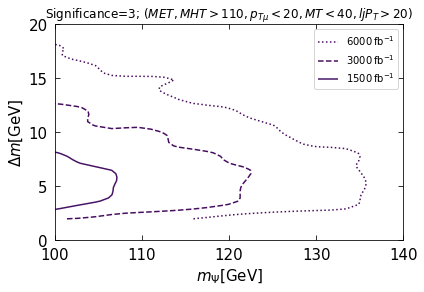

In [21]:
### now just the final plot

xlist=np.linspace(MFrange.min(),MFrange.max(),MFrange.shape[0])
ylist=np.linspace(deltaMrange.min(),deltaMrange.max(),deltaMrange.shape[0])
X,Y = np.meshgrid(xlist,ylist)

Z=S
#----------------------------------
degXYZ=3
X3=scipy.ndimage.zoom(X, degXYZ)
Y3=scipy.ndimage.zoom(Y, degXYZ)
Z3=scipy.ndimage.zoom(Z, degXYZ)

#levels = [sev3000,sev1000, sev300]
#levels = [sev5000,sev3000,sev2000]
levels = [sev6000,sev3000,sev1500]

#cp=plt.contour(X3,Y3,Z3,levels)
cp=plt.contour(X3,Y3,Z3,levels,linestyles=(':','--','-'),labels=('$6000 \\rm fb^{-1}$','$3000 \\rm fb^{-1}$','$1500 \\rm fb^{-1}$'))

N=8
#cmap=discrete_cmap(N, 'jet')
cmap=discrete_cmap(N, 'rainbow')

plt.clim(0., 2*N ) 

plt.xlabel("$m_\Psi [\\rm GeV]$",size=15)
plt.ylabel("$\Delta m[\\rm GeV]$",size=15)
plt.tick_params(direction='in',length=5,top=True,right=True,labelsize=15,pad=7)
plt.ylim(0,20.0)
plt.xlim(100,140.0)
plt.tight_layout()

labels = ['$6000\\, \\rm fb^{-1}$','$3000\\, \\rm fb^{-1}$','$1500\\, \\rm fb^{-1}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])

#plt.legend(loc='best')
plt.legend(loc='upper right')
#plt.savefig("significance110.204020.pdf")
plt.title("Significance=3; ($MET,MHT>110, p_{T\\mu}<20, MT<40, ljP_{T}>20$)")
ct()